In [15]:
!scp -r "mogu@almond.ggy.bris.ac.uk:/home/mogu/cgenie_output/muffin.CBE.worlg4.BASESFeTDTL.2100.*deg/" ~/lgm_ocn/model
#!scp -r "mogu@almond.ggy.bris.ac.uk:/home/mogu/cgenie_output/muffin.CBE.worlg4.BASESFeTDTL.SPIN/" ~/lgm_ocn/model/
#!scp -r "mogu@almond.ggy.bris.ac.uk:/home/mogu/cgenie_output/muffin.CBE.worlg4.BASESFeTDTL.historical/" ~/lgm_ocn/model/
#!scp -r "mogu@almond.ggy.bris.ac.uk:/home/mogu/cgenie_output/muffin.CBE.GIteiiva.BASESFeTDTL_rb.SPIN/" ~/lgm_ocn/model

data_genie                                    100% 1514    43.7KB/s   00:00    
data_ECOGEM                                   100% 3189   118.8KB/s   00:00    
data_GOLD                                     100% 1407    12.5KB/s   00:00    
data_GEM                                      100% 6482   214.5KB/s   00:00    
definition.xml                                100%  483KB   2.4MB/s   00:00    
muffin.CBE.worlg4.BASESFeTDTL.2100.1p5deg.con 100%   12KB 392.9KB/s   00:00    
makefile.arc                                  100%   14KB 113.8KB/s   00:00    
genie.job                                     100%   13KB 426.8KB/s   00:00    
rst.1                                         100%  127KB   1.7MB/s   00:00    
rst.sic                                       100%  343    12.7KB/s   00:00    
gsic_rst_rs_                                  100%   44KB 832.7KB/s   00:00    
genie.exe                                     100%   10MB   8.9MB/s   00:01    
rst.q                                   

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


0.03880318
0.0177332
0.023029478
0.02421705


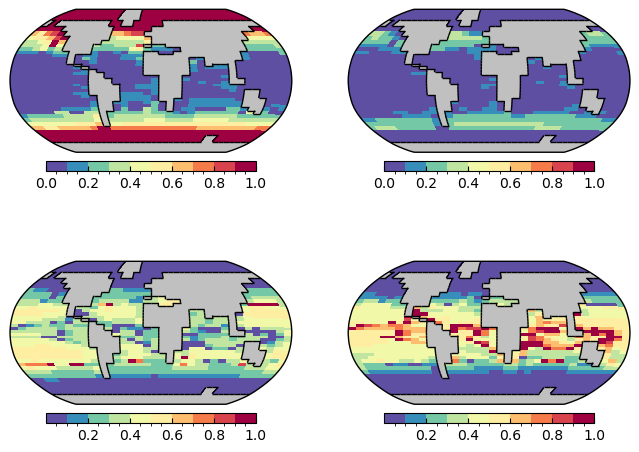

In [1]:
from cgeniepy.foram import ForamModel
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# mod_lgm = ForamModel("/Users/yingrui/lgm_ocn/model/muffin.CBE.GIteiiva.BASESFeTDTL_rb.SPIN")
# mod_pi = ForamModel("/Users/yingrui/lgm_ocn/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN")
mod_test = ForamModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN")

fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(8, 6),
                         subplot_kw=dict(projection=ccrs.Robinson()))

foram=['bn', 'bs', 'sn', 'ss']
biomass_observation = [0.006, 0.001, 0.002, 0.002]
export_observation = [0.026, 0.020, 0.001, 0.009]
# 0.3 ugC = 2.5E-8 mol C = 2.5E-5 mmol C
# 0.845 ugC = 7E-8 mol C = 7E-5 mmol C
# min_foram = 7E-5
min_foram = 0
# 6,6,<1, 1
cmap = plt.get_cmap("Spectral_r", 10)
## bs mean: 0.004 with level 2
## bs mean: 0.005 with level 5

# 5 times higher
# 0.03, 0.005, 0.01, 0.01
for i, iforam in enumerate(foram):
    print(mod_test.select_foramtype(iforam).biomass().isel(time=-1).nanmean())
    #print(mod.select_foramtype(iforam).export().isel(time=-1).nanmean())
    #print("---------------")
    mod_test.select_foramtype(iforam).relative_abundance(threshold=min_foram).take(-1, axis=0).plot_map(cmap=cmap, ax=axes.flat[i], vmax=1, contour=False)
    # mod_test.select_foramtype(iforam).biomass().isel(time=0).plot_map(ax=axes.flat[i], cmap="viridis", vmax=0.1)

In [3]:
mod_pi = ForamModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN")
mod_future = ForamModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.2100.4deg")
x = mod_pi.select_foramtype(["bn", "bs","sn","ss"]).biomass(combine_vars=True).take(-1, axis=0)
y = mod_future.select_foramtype(["bn", "bs","sn","ss"]).biomass(combine_vars=True).take(-1, axis=0)
diff = (y.array - x.array) / x.array

In [7]:
from cgeniepy.grid import GENIE_lat, GENIE_lon
lat = GENIE_lat()
lon = GENIE_lon()

## create xarray object
import xarray as xr
da = xr.DataArray(diff, coords=[lat, lon], dims=['lat', 'lon'])
da.sel(lat=slice(-40,40)).mean()

<xarray.DataArray ()>
array(-0.31819037, dtype=float32)

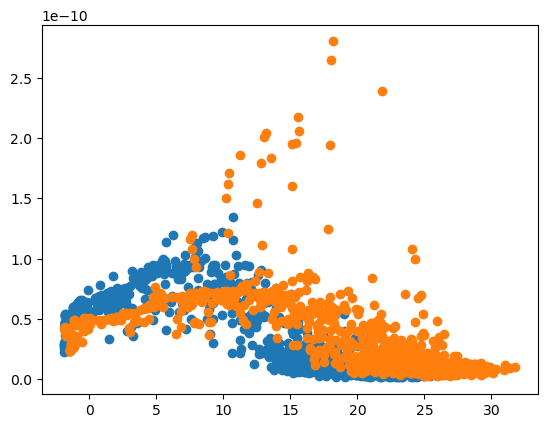

In [10]:
from cgeniepy.ecology import EcoModel
from matplotlib import pyplot as plt

mod_lgm = EcoModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.GIteiiva.BASESFeTDTL_rb.SPIN")
mod_pi = EcoModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN")

def thermal_tolerance(mod, n):
    x = mod.select_var("ocn_sur_temp").isel(time=-1).pure_array().flatten()
    y = mod.select_pft(n).biomass().isel(time=-1).pure_array().flatten()
    return x, y

x1, y1 = thermal_tolerance(mod_lgm, 7)
x2, y2 = thermal_tolerance(mod_pi, 7)

## plot the difference in one plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x1, y1)
ax.scatter(x2, y2)